In [15]:
# Elle Nguyen - CIS 3715 - Section 02
# Lab 3: Linear Regression

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt

df = pd.read_csv('~/Downloads/insurance.csv')
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [16]:
# Task 2.1 - Preprocess the raw data
# There are no missing values in the dataset
print(df.isnull().sum())

# Convert categorical features to numerical features using Label Encoder
labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df['region'] = labelencoder.fit_transform(df['region'])
print(df.info())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB
None


In [17]:
# Task 2.2 - Split the preprocessed dataset into training set and testing set
insurance_fea = df.drop('charges', axis=1).values
insurance_price = df['charges'].values
insurance_price = insurance_price / np.max(insurance_price)

X_train, X_test, y_train, y_test = train_test_split(insurance_fea,
                                                    insurance_price,
                                                    test_size=0.2,
                                                    random_state=42)

print(X_train.shape) # 80% training
print(X_test.shape) # 20% testing

# Normalize features using Min-max scaling
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(1070, 6)
(268, 6)


In [18]:
# Task 2.3 - Train the linear regression model
lr = LinearRegression()

lr.fit(X_train, y_train)

print("bias is " + str(lr.intercept_))
print("coefficients  is " + str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred, y_train)
mse = mean_squared_error(y_train_pred, y_train)
rmse = np.sqrt(mse)

print('Prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

bias is 0.20928336460705027
coefficients  is [ 5.67051024e-02 -1.47293258e-04  3.18064131e-02  8.10191467e-03
  1.49867951e-01 -4.74182139e-03]
Prediction for training set:
MAE is: 0.0659986479709151
MSE is: 0.00916737434945697
RMSE is: 0.09574640645714579


prediction for testing set:
MAE is: 0.06564969107169769
MSE is: 0.008270951713078178
RMSE is: 0.09094477287386109


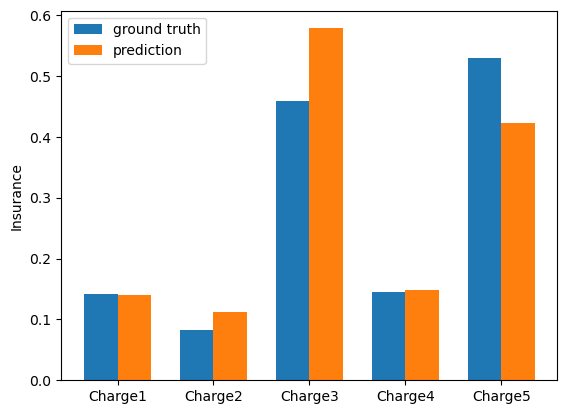

In [19]:
# Task 2.4 - Evaluate the linear regression model
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred, y_test)
mse = mean_squared_error(y_test_pred, y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))

# Plotting the model
labels = ['Charge1', 'Charge2', 'Charge3', 'Charge4', 'Charge5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Insurance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [20]:
# Task 2.5 - Use ridge regression model to do prediction
# Ridge regression model with different λ values to determine the performance
list_lambda = [0.1, 0.5, 1, 2, 3, 4, 5]
for i in range(0, len(list_lambda)):
    print("\n\tRidge regression model on testing set with λ =", list_lambda[i], "\n")
    lr = Ridge(alpha=list_lambda[i])
    lr.fit(X_test, y_test)

    print("bias is " + str(lr.intercept_))
    print("coefficients  is " + str(lr.coef_))

    y_test_pred = lr.predict(X_test)

    mae = mean_absolute_error(y_test_pred, y_test)
    mse = mean_squared_error(y_test_pred, y_test)
    rmse = np.sqrt(mse)

    print('prediction for testing set:')
    print('MAE is: {}'.format(mae))
    print('MSE is: {}'.format(mse))
    print('RMSE is: {}'.format(rmse))


	Ridge regression model on testing set with λ = 0.1 

bias is 0.20623034165711565
coefficients  is [ 0.05578254 -0.00409918  0.03045483  0.01473067  0.1558987  -0.01318723]
prediction for testing set:
MAE is: 0.0625508468691187
MSE is: 0.008115272552700668
RMSE is: 0.09008480755766017

	Ridge regression model on testing set with λ = 0.5 

bias is 0.20622713436075507
coefficients  is [ 0.05572353 -0.00407088  0.03041887  0.01469838  0.15566479 -0.01315549]
prediction for testing set:
MAE is: 0.0625787659895883
MSE is: 0.008115366162213257
RMSE is: 0.09008532711942194

	Ridge regression model on testing set with λ = 1 

bias is 0.206223131807873
coefficients  is [ 0.0556499  -0.00403572  0.03037407  0.01465821  0.1553734  -0.01311601]
prediction for testing set:
MAE is: 0.06261353465392547
MSE is: 0.00811565728025067
RMSE is: 0.09008694289546443

	Ridge regression model on testing set with λ = 2 

bias is 0.20621514867215437
coefficients  is [ 0.05550308 -0.00396611  0.03028491  0.01457

-> Conclusion:
- As λ is increasing, the errors (MAE, MSE, RMSE) are getting bigger with the performance getting worse and worse.
- By setting λ < 1, the coefficients are increasing but λ > 1 forces the coefficients to be lower. They are all going as close as possible to 0 but never equal to 0.
- Comparing to Standard Linear Regression model, I think Ridge Regression produced a lower test error to avoid overfitting, hence better performance on the testing set.